# Types of Losses

1. Mean Squared Error

mean_squared_error_manual: 44.8840217590332
mean_squared_error_tensorflow: 44.8840217590332



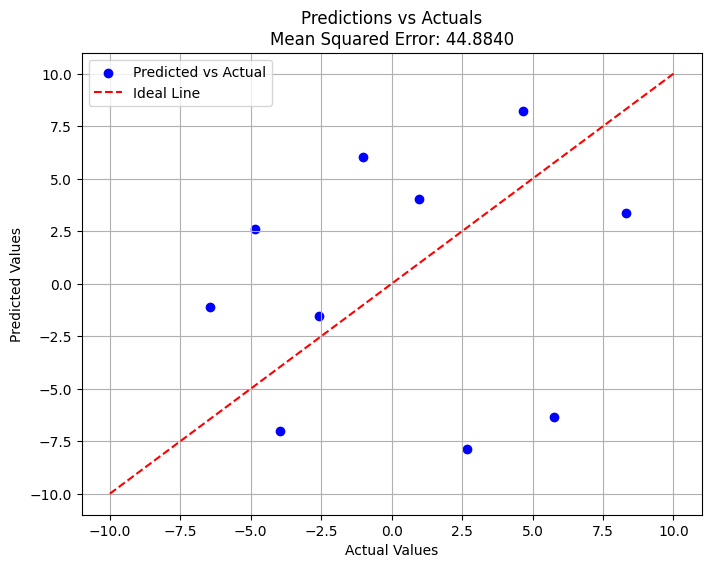

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

class MeanSquaredError_Loss:
    """
    This class provides two methods to calculate Mean Squared Error Loss.
    """
    def __init__(self):
        pass

    @staticmethod
    def mean_squared_error_manual(y_true, y_pred):
        """
        Computes the Mean Squared Error (MSE) between the true labels and the predictions.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Mean Squared Error.
        """
        squared_difference = tf.square(y_true - y_pred)
        loss = tf.reduce_mean(squared_difference)
        return loss

    @staticmethod
    def mean_squared_error_tf(y_true, y_pred):
        """
        Calculate Mean Squared Error Loss using TensorFlow's built-in function.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Mean Squared Error.
        """
        mse = tf.keras.losses.MeanSquaredError()
        loss = mse(y_true, y_pred)
        return loss

if __name__ == "__main__":
    def mean_squared_error_test(N=10, C=10):
        """
        Test the MeanSquaredError_Loss class with some random data.

        Parameters:
            N (int): The number of samples.
            C (int): Maximum value.
        """

        # Generate random data
        y_true = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.float32)
        y_pred = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.float32)


        # Test the MeanSquaredError_Loss class
        mse_manual = MeanSquaredError_Loss.mean_squared_error_manual(y_true, y_pred)
        print(f"mean_squared_error_manual: {mse_manual}")

        mse_tf = MeanSquaredError_Loss.mean_squared_error_tf(y_true, y_pred)
        print(f"mean_squared_error_tensorflow: {mse_tf}")
        print()

        # Plot the points on a graph
        plt.figure(figsize=(8, 6))
        plt.scatter(y_true.numpy(), y_pred.numpy(), color='blue', label='Predicted vs Actual')
        plt.plot([-C, C], [-C, C], 'r--', label='Ideal Line')  # Diagonal line representing ideal predictions

        plt.title(f"Predictions vs Actuals\nMean Squared Error: {mse_manual.numpy():.4f}")
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

    mean_squared_error_test()

2. Mean Absolute Error

mean_absolute_error_manual: 7.04141902923584
mean_absolute_error_tensorflow: 7.04141902923584



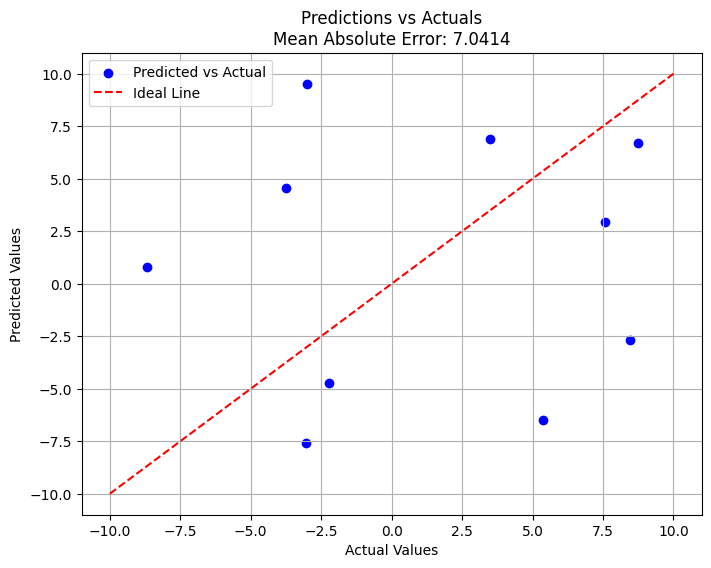

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

class MeanAbsoluteError_Loss:
    """
    This class provides two methods to calculate Mean Absolute Error Loss.
    """
    def __init__(self):
        pass

    @staticmethod
    def mean_absolute_error_manual(y_true, y_pred):
        """
        Computes the Mean absolute Error (MAE) between the true labels and the predictions.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Mean Absolute Error.
        """
        absolute_difference = tf.math.abs(y_true - y_pred)
        loss = tf.reduce_mean(absolute_difference)
        return loss

    @staticmethod
    def mean_absolute_error_tf(y_true, y_pred):
        """
        Calculate Mean Absolute Error Loss using TensorFlow's built-in function.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Mean Absolute Error.
        """
        mae = tf.keras.losses.MeanAbsoluteError()
        loss = mae(y_true, y_pred)
        return loss

if __name__ == "__main__":
    def mean_absolute_error_test(N=10, C=10):
        """
        Test the MeanAbsoluteError_Loss class with some random data.

        Parameters:
            N (int): The number of samples.
            C (int): Maximum value.
        """

        # Generate random data
        y_true = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.float32)
        y_pred = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.float32)


        # Test the MeanabsoluteError_Loss class
        mae_manual = MeanAbsoluteError_Loss.mean_absolute_error_manual(y_true, y_pred)
        print(f"mean_absolute_error_manual: {mae_manual}")

        mae_tf = MeanAbsoluteError_Loss.mean_absolute_error_tf(y_true, y_pred)
        print(f"mean_absolute_error_tensorflow: {mae_tf}")
        print()

        # Plot the points on a graph
        plt.figure(figsize=(8, 6))
        plt.scatter(y_true.numpy(), y_pred.numpy(), color='blue', label='Predicted vs Actual')
        plt.plot([-C, C], [-C, C], 'r--', label='Ideal Line')  # Diagonal line representing ideal predictions

        plt.title(f"Predictions vs Actuals\nMean Absolute Error: {mae_manual.numpy():.4f}")
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

    mean_absolute_error_test()

3. Huber Loss

huber_loss_manual: 8.8986234664917
huber_loss_tensorflow: 8.8986234664917



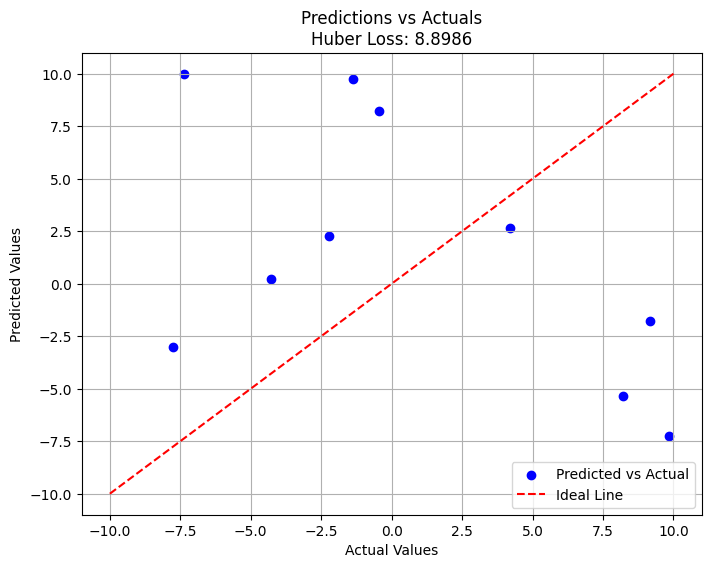

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

class Huber_Loss:
    """
    This class provides two methods to calculate Huber Loss.
    """
    def __init__(self, delta = 1.0):
        """
        param:
            delta: The threshold at which the loss function transitions from quadratic to linear. Default is 1.0.
        """
        self.delta = delta

    def huber_loss_manual(self, y_true, y_pred):
        """
        Computes the Huber Loss between the true labels and the predictions.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Huber Loss.
        """
        error = tf.math.abs(y_true - y_pred)
        is_small_error = tf.math.less_equal(error, self.delta)
        small_error_loss = tf.math.square(error) / 2
        large_error_loss = self.delta * (error - (0.5 * self.delta))
        loss = tf.where(is_small_error, small_error_loss, large_error_loss)
        loss = tf.reduce_mean(loss)
        return loss

    def huber_loss_tf(self, y_true, y_pred):
        """
        Calculate Huber Loss using TensorFlow's built-in function.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Huber Loss.
        """
        huber_loss = tf.keras.losses.Huber(delta = self.delta)(y_true, y_pred)
        return huber_loss

if __name__ == "__main__":
    def huber_loss_test(N=10, C=10):
        """
        Test the Huber_Loss class with some random data.

        Parameters:
            N (int): The number of samples.
            C (int): Maximum value.
        """

        # Generate random data
        y_true = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.float32)
        y_pred = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.float32)


        # Test the Huber_Loss class
        huber = Huber_Loss()
        hl_manual = huber.huber_loss_manual(y_true, y_pred)
        print(f"huber_loss_manual: {hl_manual}")

        hl_tf = huber.huber_loss_tf(y_true, y_pred)
        print(f"huber_loss_tensorflow: {hl_tf}")
        print()

        # Plot the points on a graph
        plt.figure(figsize=(8, 6))
        plt.scatter(y_true.numpy(), y_pred.numpy(), color='blue', label='Predicted vs Actual')
        plt.plot([-C, C], [-C, C], 'r--', label='Ideal Line')  # Diagonal line representing ideal predictions

        plt.title(f"Predictions vs Actuals\nHuber Loss: {hl_manual.numpy():.4f}")
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

    huber_loss_test()

4. Cross-Entropy Loss

cross_entropy_loss_manual: -31.593280792236328
cross_entropy_loss_tensorflow: -31.593280792236328



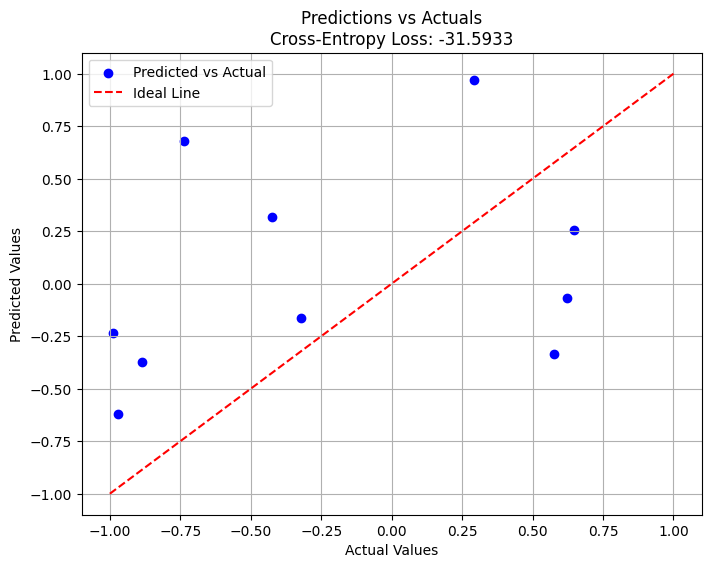

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

class Cross_Entropy_Loss:
    """
    This class provides two methods to calculate Cross-Entropy Loss.
    """
    def __init__(self):
        pass

    def cross_entropy_loss_manual(self, y_true, y_pred):
        """
        Computes the Cross-Entropy Loss between the true labels and the predictions.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Cross-Entropy Loss.
        """
        y_pred /= tf.reduce_sum(y_pred)
        epsilon = tf.keras.backend.epsilon()
        y_pred_new = tf.clip_by_value(y_pred, epsilon, 1.)
        loss =  - tf.reduce_sum(y_true * tf.math.log(y_pred_new))
        return loss

    def cross_entropy_loss_tf(self, y_true, y_pred):
        """
        Calculate Cross-Entropy Loss using TensorFlow's built-in function.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Cross-Entropy Loss.
        """
        loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
        return loss

if __name__ == "__main__":
    def cross_entropy_loss_test(N=10, C=1):
        """
        Test the Cross_Entropy_Loss class with some random data.

        Parameters:
            N (int): The number of samples.
            C (int): Maximum value.
        """

        # Generate random data
        y_true = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.float32)
        y_pred = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.float32)


        # Test the Cross-Entropy_Loss class
        cross_entropy = Cross_Entropy_Loss()
        ce_manual = cross_entropy.cross_entropy_loss_manual(y_true, y_pred)
        print(f"cross_entropy_loss_manual: {ce_manual}")

        ce_tf = cross_entropy.cross_entropy_loss_tf(y_true, y_pred)
        print(f"cross_entropy_loss_tensorflow: {ce_tf}")
        print()

        # Plot the points on a graph
        plt.figure(figsize=(8, 6))
        plt.scatter(y_true.numpy(), y_pred.numpy(), color='blue', label='Predicted vs Actual')
        plt.plot([-C, C], [-C, C], 'r--', label='Ideal Line')  # Diagonal line representing ideal predictions

        plt.title(f"Predictions vs Actuals\nCross-Entropy Loss: {ce_manual.numpy():.4f}")
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

    cross_entropy_loss_test()

5. Hinge Loss

hinge_loss_manual: 84
hinge_loss_tensorflow: 84.0



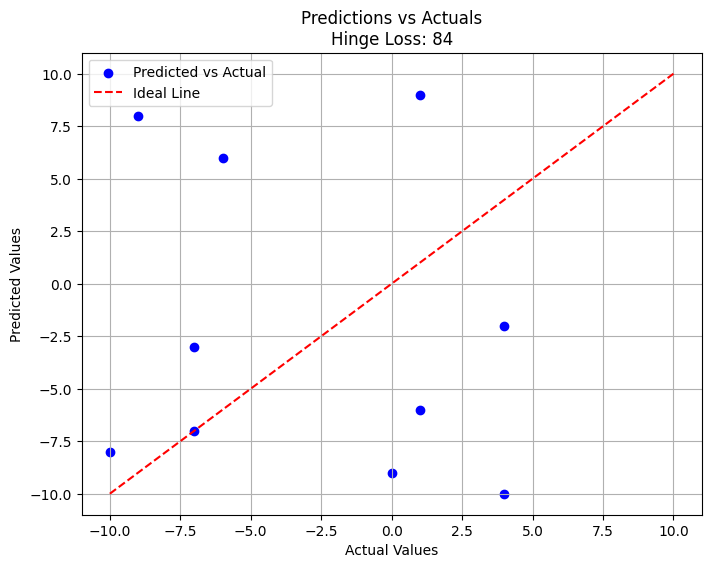

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

class Hinge_Loss:
    """
    This class provides two methods to calculate Hinge Loss.
    """
    def __init__(self):
        pass

    def hinge_loss_manual(self, y_true, y_pred):
        """
        Computes the Hinge Loss between the true labels and the predictions.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Hinge Loss.
        """
        pos = tf.reduce_sum(y_true * y_pred, axis=-1)
        neg = tf.reduce_max((1 - y_true) * y_pred, axis=-1)
        loss = tf.maximum(0, neg - pos + 1)
        return loss

    def hinge_loss_tf(self, y_true, y_pred):
        """
        Calculate Hinge Loss using TensorFlow's built-in function.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Hinge Loss.
        """
        loss = tf.keras.losses.CategoricalHinge()(y_true, y_pred)
        return loss

if __name__ == "__main__":
    def hinge_loss_test(N=10, C=10):
        """
        Test the hinge_Loss class with some random data.

        Parameters:
            N (int): The number of samples.
            C (int): Maximum value.
        """

        # Generate random data
        y_true = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.int32)
        y_pred = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.int32)


        # Test the Hinge_Loss class
        cross_entropy = Hinge_Loss()
        hl_manual = cross_entropy.hinge_loss_manual(y_true, y_pred)
        print(f"hinge_loss_manual: {hl_manual}")

        hl_tf = cross_entropy.hinge_loss_tf(y_true, y_pred)
        print(f"hinge_loss_tensorflow: {hl_tf}")
        print()

        # Plot the points on a graph
        plt.figure(figsize=(8, 6))
        plt.scatter(y_true.numpy(), y_pred.numpy(), color='blue', label='Predicted vs Actual')
        plt.plot([-C, C], [-C, C], 'r--', label='Ideal Line')  # Diagonal line representing ideal predictions

        plt.title(f"Predictions vs Actuals\nHinge Loss: {hl_manual.numpy()}")
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

    hinge_loss_test()

6. Intersection Over Union

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

class IOU:
    """
    This class provides two methods to calculate Intersection Over Union.
    """
    def __init__(self):
        pass

    def IOU_manual(self, y_true, y_pred):
        """
        Computes the Intersection Over Union between the true labels and the predictions.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Intersection Over Union.
        """

        intersection = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 1)), dtype=tf.float32))
        union = tf.reduce_sum(tf.cast(tf.logical_or(tf.equal(y_true, 1), tf.equal(y_pred, 1)), dtype=tf.float32))
        iou = intersection / union
        return iou

    def IOU_tf(self, y_true, y_pred):
        """
        Calculate Intersection Over Union using TensorFlow's built-in function.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Intersection Over Union.
        """

        iou_metric = tf.keras.metrics.IoU(num_classes=2, target_class_ids=[1])
        iou_metric.update_state(y_true, y_pred)
        iou = iou_metric.result()
        return iou

if __name__ == "__main__":
    def IOU_test(N=10, C=10):
        """
        Test the IOU class with some random data.

        Parameters:
            N (int): The number of samples.
            C (int): Maximum value.
        """

        # Generate random data
        y_true = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.int32)
        y_pred = tf.random.uniform(shape=(N, ), minval=-C, maxval=C, dtype=tf.int32)

        y_true = tf.constant([[0, 1, 1, 0],
                              [0, 1, 1, 0],
                              [0, 0, 0, 0],
                              [0, 0, 0, 0]], dtype=tf.float32)  # Example binary mask (ground truth)

        y_pred = tf.constant([[0, 1, 1, 0],
                              [1, 1, 0, 0],
                              [0, 0, 0, 0],
                              [0, 0, 0, 0]], dtype=tf.float32)  # Example binary mask (prediction)

        iou = IOU()

        iou_manual = iou.IOU_manual(y_true, y_pred)
        print(f"IOU_manual: {iou_manual}")

        iou_tf = iou.IOU_tf(y_true, y_pred)
        print(f"IOU_tensorflow: {iou_tf}")

    IOU_test()

IOU_manual: 0.6000000238418579
IOU_tensorflow: 0.5999999642372131


7. KL divergence

kullback_leibler_manual: 0.4935988187789917
kullback_leibler_tensorflow: 0.4935988187789917



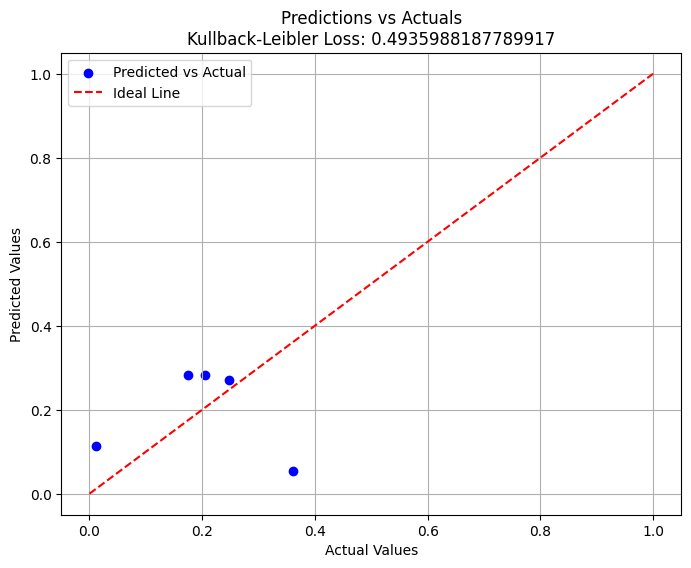

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

class Kullback_Leibler:
    """
    This class provides two methods to calculate Kullback-Leibler Loss.
    """
    def __init__(self):
        pass

    def kullback_leibler_manual(self, y_true, y_pred):
        """
        Computes the Kullback-Leibler Loss between the true labels and the predictions.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Kullback-Leibler Loss.
        """
        epsilon = tf.keras.backend.epsilon()
        y_true = tf.clip_by_value(y_true, epsilon, 1)
        y_pred = tf.clip_by_value(y_pred, epsilon, 1)

        loss = tf.reduce_sum(y_true * tf.math.log(y_true / y_pred), axis=-1)
        return loss

    def kullback_leibler_tf(self, y_true, y_pred):
        """
        Calculate Kullback-Leibler Loss using TensorFlow's built-in function.

        Args:
            y_true (tf.Tensor): Tensor of true values.
            y_pred (tf.Tensor): Tensor of predicted values.

        Returns:
            tf.Tensor: The computed Kullback-Leibler Loss.
        """
        loss = tf.reduce_sum(tf.keras.losses.KLDivergence()(y_true, y_pred))
        return loss

if __name__ == "__main__":
    def kullback_leibler_test(N=5, C=1):
        """
        Test the Kullback-Leibler class with some random data.

        Parameters:
            N (int): The number of samples.
            C (int): Maximum value.
        """

        # Generate random data
        y_true = tf.random.uniform(shape=(N, ), minval=0, maxval=C, dtype=tf.float32)
        y_pred = tf.random.uniform(shape=(N, ), minval=0, maxval=C, dtype=tf.float32)

        #converting them to probabilities
        y_true /= tf.reduce_sum(y_true)
        y_pred /= tf.reduce_sum(y_pred)

        # Test the kullback_leibler class
        kl = Kullback_Leibler()
        kl_manual = kl.kullback_leibler_manual(y_true, y_pred)
        print(f"kullback_leibler_manual: {kl_manual}")

        kl_tf = kl.kullback_leibler_tf(y_true, y_pred)
        print(f"kullback_leibler_tensorflow: {kl_tf}")
        print()

        # Plot the points on a graph
        plt.figure(figsize=(8, 6))
        plt.scatter(y_true.numpy(), y_pred.numpy(), color='blue', label='Predicted vs Actual')
        plt.plot([0, C], [0, C], 'r--', label='Ideal Line')  # Diagonal line representing ideal predictions

        plt.title(f"Predictions vs Actuals\nKullback-Leibler Loss: {kl_manual.numpy()}")
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

    kullback_leibler_test()